Importing the neccessary library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from obspy import read
from scipy.fft import fft, fftfreq
import os

Catalog upload from NASA apollo missions

In [3]:
cat_directory = './data/lunar/training/catalogs/'
cat_file = cat_directory + 'apollo12_catalog_GradeA_final.csv'
cat = pd.read_csv(cat_file)
cat

,filename,time_abs(%Y-%m-%dT%H:%M:%S.%f),time_rel(sec),evid,mq_type
0,xa.s12.00.mhz.1970-01-19HR00_evid00002,1970-01-19T20:25:00.000000,73500.0,evid00002,impact_mq
1,xa.s12.00.mhz.1970-03-25HR00_evid00003,1970-03-25T03:32:00.000000,12720.0,evid00003,impact_mq
2,xa.s12.00.mhz.1970-03-26HR00_evid00004,1970-03-26T20:17:00.000000,73020.0,evid00004,impact_mq
3,xa.s12.00.mhz.1970-04-25HR00_evid00006,1970-04-25T01:14:00.000000,4440.0,evid00006,impact_mq
4,xa.s12.00.mhz.1970-04-26HR00_evid00007,1970-04-26T14:29:00.000000,52140.0,evid00007,deep_mq
...,...,...,...,...,...
71,xa.s12.00.mhz.1974-10-14HR00_evid00156,1974-10-14T17:43:00.000000,63780.0,evid00156,impact_mq
72,xa.s12.00.mhz.1975-04-12HR00_evid00191,1975-04-12T18:15:00.000000,65700.0,evid00191,impact_mq
73,xa.s12.00.mhz.1975-05-04HR00_evid00192,1975-05-04T10:05:00.000000,36300.0,evid00192,impact_mq
74,xa.s12.00.mhz.1975-06-24HR00_evid00196,1975-06-24T16:03:00.000000,57780.0,evid00196,impact_mq


In [6]:
def generatevalues(i):
    row = cat.iloc[i]
    # If we want the value of relative time, we don't need to use datetime
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row.filename
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = f'{data_directory}{test_filename}.csv'
    data = pd.read_csv(csv_file)
    data=data.loc[data['time_rel(sec)']>=arrival_time_rel]
    # data=data.loc[int(data['velocity(m/s)'])]
    # t=arv['time_rel(sec)'].index[0]
    time = data['time_rel(sec)']  # Assuming the first column is time
    amplitude = data['velocity(m/s)']  # Assuming the second column is amplitude
    amplitude=np.asfarray(amplitude)
    # Number of sample points
    N = len(amplitude)
    # Sample spacing (assuming uniform sampling)
    time=np.array(time)
    T = time[1] - time[0]
    # Perform the Fourier Transform
    yf = 2.0/N * np.abs(fft(amplitude)[:N//2])
    xf = fftfreq(N, T)[:N//2]
    max_velocity=np.max(yf)
    weighted_velocity=np.sum(yf*xf)/np.sum(xf)
    mean_velocity=np.mean(yf)
    freq_of_max=xf[np.argmax(yf)]
    area=(np.sum(yf*xf))
    label=row['mq_type']
    return np.array([max_velocity, weighted_velocity, mean_velocity, freq_of_max, area, label])

Plot generation method

In [8]:
def generateplot(i):
    row = cat.iloc[i]
    # If we want the value of relative time, we don't need to use datetime
    arrival_time_rel = row['time_rel(sec)']
    test_filename = row.filename
    data_directory = './data/lunar/training/data/S12_GradeA/'
    csv_file = f'{data_directory}{test_filename}.csv'
    data = pd.read_csv(csv_file)
    data=data.loc[data['time_rel(sec)']>=arrival_time_rel]
    # data=data.loc[int(data['velocity(m/s)'])]
    # t=arv['time_rel(sec)'].index[0]
    time = data['time_rel(sec)']  # Assuming the first column is time
    amplitude = data['velocity(m/s)']  # Assuming the second column is amplitude
    amplitude=np.asfarray(amplitude)
    # Number of sample points
    N = len(amplitude)
    # Sample spacing (assuming uniform sampling)
    time=np.array(time)
    T = time[1] - time[0]
    # Perform the Fourier Transform
    yf = 2.0/N * np.abs(fft(amplitude)[:N//2])
    xf = fftfreq(N, T)[:N//2]
    pl=plt
    pl.plot(xf, yf,color='blue')
    pl.grid(True)
    pl.xlabel('Frequency (Hz)')
    pl.ylabel('Velocity')
    pl.title(f'Frequency Spectrum of Moonquake Waveform {i}:{row['mq_type']}')

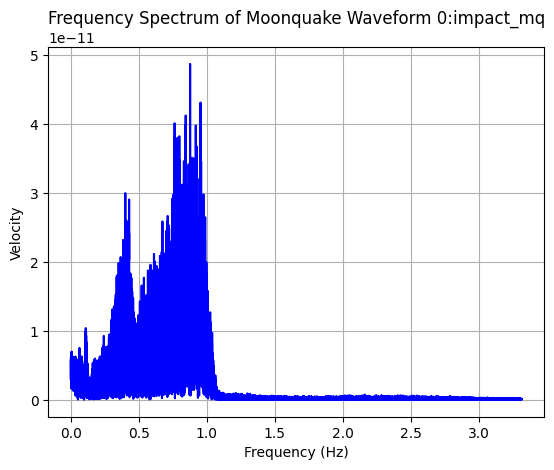

In [9]:
generateplot(0)

Generating the relevant data and storing

In [74]:
lis=[]
for i in range(76):
    lis.append(generatevalues(i))
    print("i=",i)

i= 0
i= 1
i= 2
i= 3
i= 4
i= 5
i= 6
i= 7
i= 8
i= 9
i= 10
i= 11
i= 12
i= 13
i= 14
i= 15
i= 16
i= 17
i= 18
i= 19
i= 20
i= 21
i= 22
i= 23
i= 24
i= 25
i= 26
i= 27
i= 28
i= 29
i= 30
i= 31
i= 32
i= 33
i= 34
i= 35
i= 36
i= 37
i= 38
i= 39
i= 40
i= 41
i= 42
i= 43
i= 44
i= 45
i= 46
i= 47
i= 48
i= 49
i= 50
i= 51
i= 52
i= 53
i= 54
i= 55
i= 56
i= 57
i= 58
i= 59
i= 60
i= 61
i= 62
i= 63
i= 64
i= 65
i= 66
i= 67
i= 68
i= 69
i= 70
i= 71
i= 72
i= 73
i= 74
i= 75


In [75]:
lis

[array(['4.869751207271401e-11', '1.135248986099039e-12',
        '2.5473199929817543e-12', '0.8772155082653814',
        '8.035556627063156e-08', 'impact_mq'], dtype='<U32'),
 array(['2.53527299132083e-11', '1.8921556393640104e-13',
        '5.686999758953281e-13', '0.8281300894618563',
        '7.648820687378829e-08', 'impact_mq'], dtype='<U32'),
 array(['3.463589995400369e-11', '7.980257400482433e-13',
        '1.85863801916563e-12', '0.9697655465692081',
        '5.858502725619864e-08', 'impact_mq'], dtype='<U32'),
 array(['2.072148770010002e-11', '1.9408915898644908e-13',
        '4.485189292219276e-13', '0.828125', '8.72761145784401e-08',
        'impact_mq'], dtype='<U32'),
 array(['1.354161694177282e-11', '3.1266409031987667e-13',
        '7.601148106554978e-13', '0.8281286484009817',
        '5.877052618320202e-08', 'deep_mq'], dtype='<U32'),
 array(['5.987094281255129e-11', '1.8008792318951618e-12',
        '3.4937372020339374e-12', '0.8333742076667674',
        '1.7786772048

This was saved as Moonquakes.csv

In [94]:
data=pd.read_csv("Moonquakes.csv")

Preprocessing the data with relevant features

In [95]:
data

,0,max_velocity,weighted_velocity,mean_velocity,freq_of_max,area,label
0,1,4.869751e-11,1.135249e-12,2.547320e-12,0.877216,8.035557e-08,impact_mq
1,2,2.535273e-11,1.892156e-13,5.687000e-13,0.828130,7.648821e-08,impact_mq
2,3,3.463590e-11,7.980257e-13,1.858638e-12,0.969766,5.858503e-08,impact_mq
3,4,2.072149e-11,1.940892e-13,4.485189e-13,0.828125,8.727611e-08,impact_mq
4,5,1.354162e-11,3.126641e-13,7.601148e-13,0.828129,5.877053e-08,deep_mq
...,...,...,...,...,...,...,...
71,72,5.643753e-11,5.636102e-13,1.157535e-12,0.828108,6.995075e-08,impact_mq
72,73,1.755147e-10,9.065459e-12,1.510983e-11,0.932794,1.029691e-06,impact_mq
73,74,1.808627e-10,6.075517e-12,1.188052e-11,0.394710,1.670025e-06,impact_mq
74,75,2.268123e-11,3.249055e-13,6.390916e-13,0.828151,5.101853e-08,impact_mq


In [98]:
data=data.drop("0",axis=1)

In [100]:
data

,max_velocity,weighted_velocity,mean_velocity,freq_of_max,area,label
0,4.869751e-11,1.135249e-12,2.547320e-12,0.877216,8.035557e-08,impact_mq
1,2.535273e-11,1.892156e-13,5.687000e-13,0.828130,7.648821e-08,impact_mq
2,3.463590e-11,7.980257e-13,1.858638e-12,0.969766,5.858503e-08,impact_mq
3,2.072149e-11,1.940892e-13,4.485189e-13,0.828125,8.727611e-08,impact_mq
4,1.354162e-11,3.126641e-13,7.601148e-13,0.828129,5.877053e-08,deep_mq
...,...,...,...,...,...,...
71,5.643753e-11,5.636102e-13,1.157535e-12,0.828108,6.995075e-08,impact_mq
72,1.755147e-10,9.065459e-12,1.510983e-11,0.932794,1.029691e-06,impact_mq
73,1.808627e-10,6.075517e-12,1.188052e-11,0.394710,1.670025e-06,impact_mq
74,2.268123e-11,3.249055e-13,6.390916e-13,0.828151,5.101853e-08,impact_mq


We used min-max scaling as standard scaler can change the distribution to normal

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [106]:
scaler=MinMaxScaler()
sc=scaler.fit(data.iloc[:,0:5])
data.iloc[:,0:5]=sc.transform(data.iloc[:,0:5])

In [107]:
data

,max_velocity,weighted_velocity,mean_velocity,freq_of_max,area,label
0,0.034204,0.019671,0.024436,0.889083,0.032345,impact_mq
1,0.015719,0.001456,0.003524,0.832338,0.030445,impact_mq
2,0.023070,0.013179,0.017157,0.996074,0.021650,impact_mq
3,0.012052,0.001550,0.002254,0.832332,0.035745,impact_mq
4,0.006367,0.003833,0.005547,0.832336,0.021741,deep_mq
...,...,...,...,...,...,...
71,0.040332,0.008665,0.009748,0.832313,0.027233,impact_mq
72,0.134618,0.172360,0.157205,0.953333,0.498717,impact_mq
73,0.138852,0.114792,0.123075,0.331287,0.813288,impact_mq
74,0.013604,0.004069,0.004268,0.832362,0.017933,impact_mq


Label Encoder was used to change the categorical feature of moonquake class to numerically processable data

In [108]:
from sklearn.preprocessing import LabelEncoder

In [109]:
enc=LabelEncoder()

In [112]:
data["label"]=enc.fit_transform(data["label"])

In [113]:
data

,max_velocity,weighted_velocity,mean_velocity,freq_of_max,area,label
0,0.034204,0.019671,0.024436,0.889083,0.032345,1
1,0.015719,0.001456,0.003524,0.832338,0.030445,1
2,0.023070,0.013179,0.017157,0.996074,0.021650,1
3,0.012052,0.001550,0.002254,0.832332,0.035745,1
4,0.006367,0.003833,0.005547,0.832336,0.021741,0
...,...,...,...,...,...,...
71,0.040332,0.008665,0.009748,0.832313,0.027233,1
72,0.134618,0.172360,0.157205,0.953333,0.498717,1
73,0.138852,0.114792,0.123075,0.331287,0.813288,1
74,0.013604,0.004069,0.004268,0.832362,0.017933,1


Random forest classifier was used as it is a simple ML algorithm (usable on rovers) but yet it is resilient to the class imbalance problem as bootstrapping can be done. Also we can fine tune it boosting to predict the rare Shallow moonquakes. It can also remove irrelevant features on its own. It also does not presume any distribution and is prone to overfitting too (neccessary in seismic detection)

In [130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(class_weight='balanced')
clf.fit(data.iloc[:,0:5],data.iloc[:,5])


RandomForestClassifier(class_weight='balanced')

In [ ]:
clf.predict([data.iloc[3,0:5]])

In [ ]:
clf.predict([data.iloc[69,0:5]])

Saving the model for usage

In [134]:
import joblib

In [135]:
joblib.dump(clf, 'moonquake_model.joblib')

print("Model saved successfully!")

Model saved successfully!
